# Module import 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import os
import warnings

sns.set(style='whitegrid')
warnings.simplefilter('ignore')

# Data preprocessing

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Project_3. Exploratory Data Analysis.ipynb',
 'stud_math.csv']

In [3]:
# os.getcwd()
# os.rename('C:\\Users\\glavr\\GitHub\\skillfactory_rds\\module_2\stud_math.csv.csv',
#           'C:\\Users\\glavr\\GitHub\\skillfactory_rds\\module_2\stud_math.csv')

In [4]:
data = pd.read_csv('stud_math.csv')
display(data.head())
display(data.info())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [6]:
data.describe(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


> It makes sense to bring all columns to the same format for comfort

In [7]:
data.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
                'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
                'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
                'study_time', 'higher', 'internet', 'romantic', 'fam_rel',
                'free_time', 'goout', 'health', 'absences', 'score']

## Column review

> It is necessary to go over each column step by step in order to unify the data


### School

In [8]:
data.school.unique()

array(['GP', 'MS'], dtype=object)

In [9]:
def count_plot(column, hue=None):
    """
    This function creates a basic seaborn countplot 
    for an entered column with certain parameters
    """
    fig = plt.figure()
    axes = fig.add_axes([0, 0, 1.4, 1.2])
    sns.countplot(column, hue=hue)
    plt.yticks(size=15)
    plt.xticks(size=15)

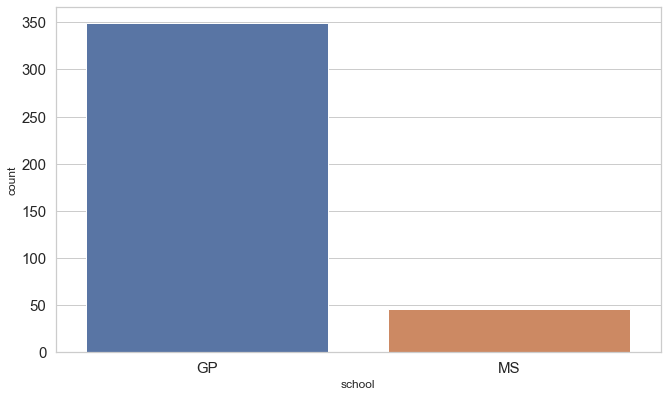

In [10]:
count_plot(data.school)

> The overwhelming majority of students are from GP (about 7 times more students than in MS)

### Sex

In [11]:
data.sex.unique()

array(['F', 'M'], dtype=object)

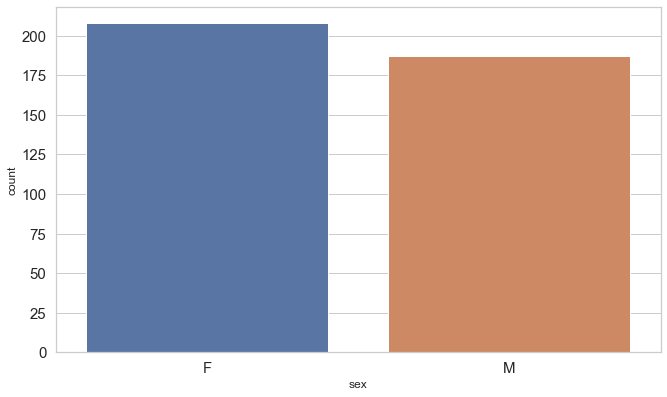

In [12]:
count_plot(data.sex)

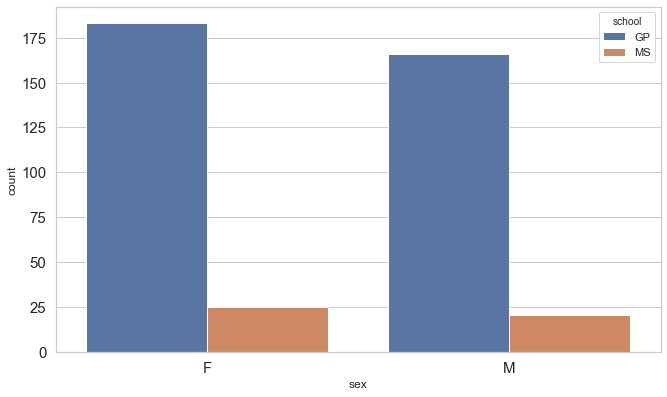

In [13]:
count_plot(data.sex, hue=data.school)

> The distribution of boys and girls is quite similar in general as well as for each school separately

### Age 

In [14]:
data.age.unique()

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

In [15]:
def dist_plot(column, kde=True, bins=10):
    """
    This function create a basic seaborn distplot
    for an entered column with certain parameters
    """
    fig = plt.figure()
    axes= fig.add_axes([0, 0, 1.4, 1.2])
    sns.distplot(column, kde=kde, bins=bins)
    plt.xticks(size=15)
    plt.yticks(size=15)

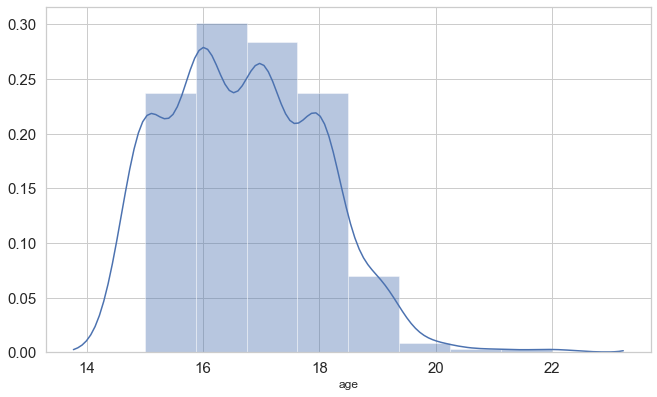

In [16]:
dist_plot(data.age, bins=8)

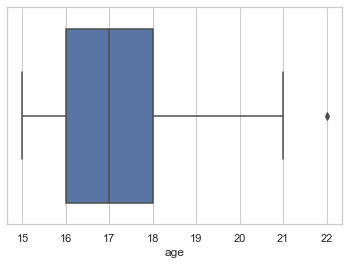

In [17]:
sns.boxplot(data.age)

> * There is only one 22-year-old student who can be considered as an outlier
> * It is better to get rid from such an observation

In [18]:
data = data.loc[data.age != 22]
data

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,study_time,higher,internet,romantic,fam_rel,free_time,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


### Address

In [19]:
data.address.unique()

array(['U', nan, 'R'], dtype=object)

In [20]:
def nan_killer(x):
    """
    This function substitutes nan-values
    with None values in a column
    """
    if pd.isna(x) or str(x).lower() == 'nan':
        return None
    return x

In [21]:
data.address = data.address.astype(str).apply(nan_killer)
data.address.unique()

array(['U', None, 'R'], dtype=object)

In [22]:
data.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  377 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


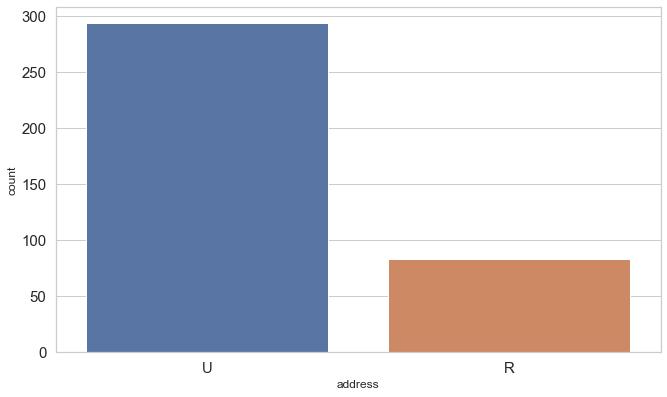

In [23]:
count_plot(data.address)

> Most students are from urban area

###  Family size

In [24]:
data.fam_size.unique()

array([nan, 'GT3', 'LE3'], dtype=object)

In [25]:
data.fam_size = data.fam_size.astype(str).apply(nan_killer)
data.fam_size.unique()

array([None, 'GT3', 'LE3'], dtype=object)

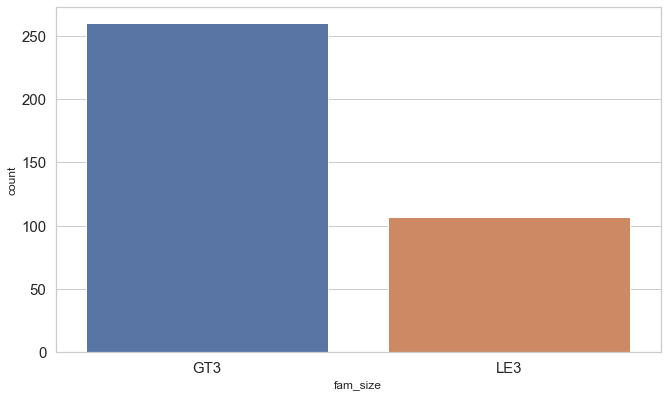

In [26]:
count_plot(data.fam_size)

> Most students have families with less than 3 family members

### Parents' joint housing status (live separately or together)

In [27]:
data.p_status.unique()

array(['A', nan, 'T'], dtype=object)

In [28]:
data.p_status = data.p_status.astype(str).apply(nan_killer)
data.p_status.unique()

array(['A', None, 'T'], dtype=object)

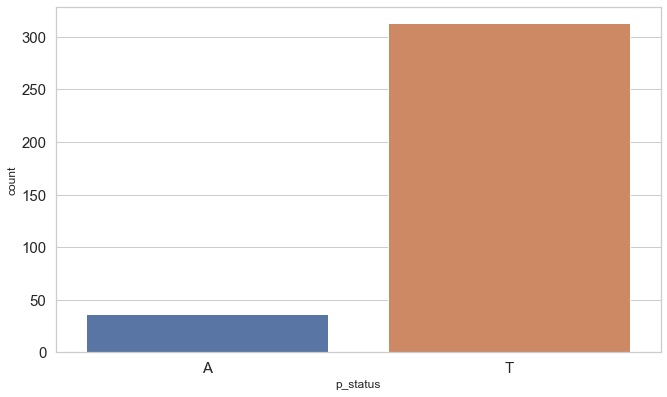

In [29]:
count_plot(data.p_status)

### Mother's education


In [30]:
data.m_edu.unique()

array([ 4.,  1.,  3.,  2., nan,  0.])

In [31]:
data.m_edu = data.m_edu.apply(nan_killer)
data.m_edu.unique()

array([ 4.,  1.,  3.,  2., nan,  0.])

In [32]:
data.loc[:, ['m_edu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   391 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


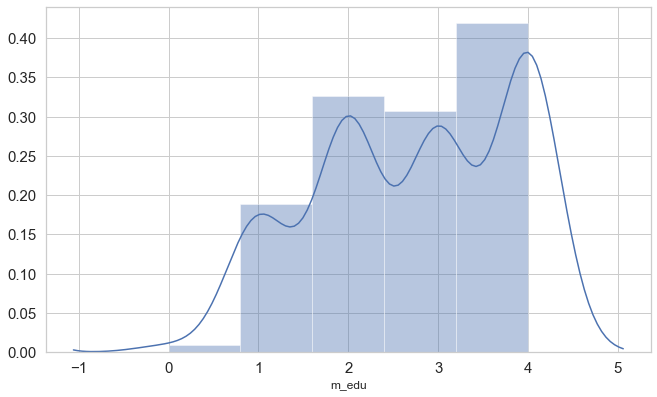

In [33]:
dist_plot(data.m_edu, bins=5)

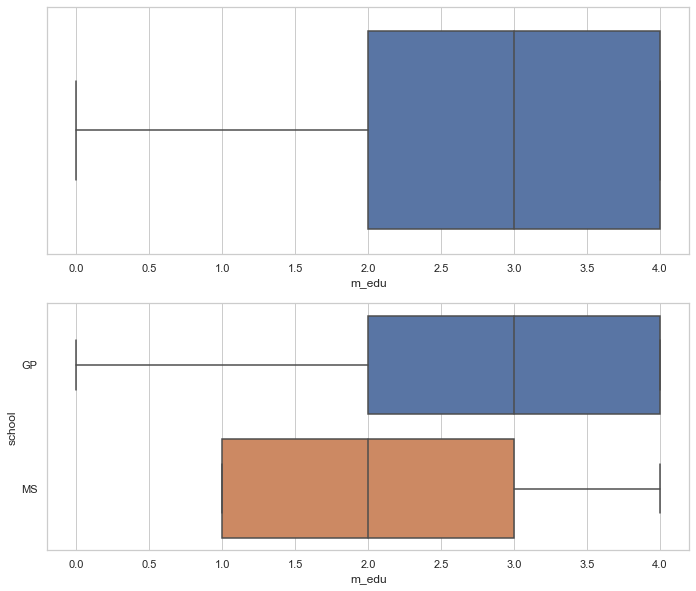

In [34]:
fix, axes = plt.subplots(nrows=2, ncols=1, figsize=(11.5, 10))
sns.boxplot(data.m_edu, ax=axes[0])
sns.boxplot(x=data.m_edu, y=data.school, ax=axes[1])

> The are no outliers among mother's education values

### Father's education

In [35]:
data.f_edu.unique()

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

In [36]:
data.f_edu = data.f_edu.astype(str).apply(nan_killer)
data.f_edu.unique()

array(['4.0', '1.0', '2.0', '3.0', '40.0', None, '0.0'], dtype=object)

In [37]:
data.f_edu.sort_values()

76      0.0
171     0.0
394     1.0
350     1.0
258     1.0
       ... 
290    None
310    None
328    None
349    None
374    None
Name: f_edu, Length: 394, dtype: object

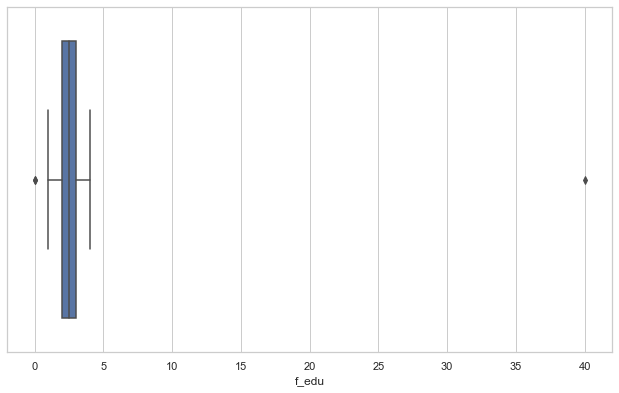

In [38]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1.4, 1.2])
sns.boxplot(data.f_edu.astype(float))

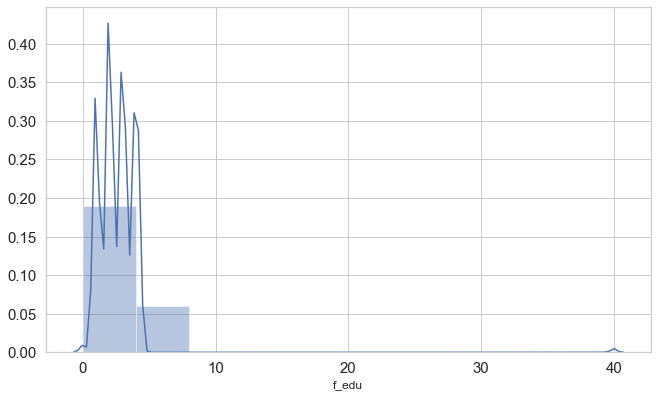

In [39]:
dist_plot(data.f_edu)

In [40]:
data.loc[data.f_edu == '40.0']

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,study_time,higher,internet,romantic,fam_rel,free_time,goout,health,absences,score
11,GP,F,15,U,GT3,None,2.0,40.0,services,other,...,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


> * There is definitely an outlier with an unreal value

In [41]:
data = data.loc[data.f_edu != '40.0']
data

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,study_time,higher,internet,romantic,fam_rel,free_time,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


### Mother's job

In [42]:
data.m_job.unique()

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

In [43]:
data.m_job = data.m_job.apply(nan_killer)
data.m_job.unique()

array(['at_home', 'health', 'other', 'services', 'teacher', None],
      dtype=object)

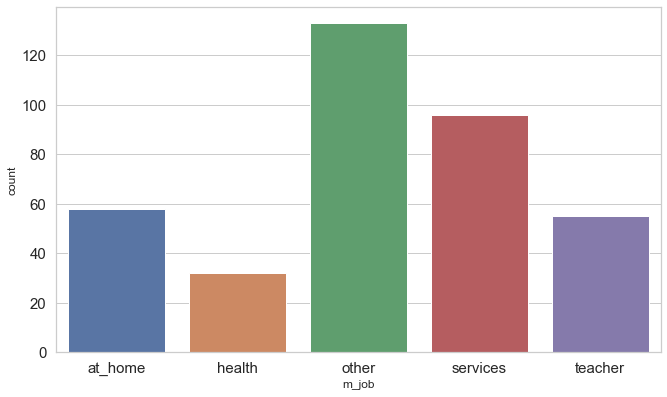

In [44]:
count_plot(data.m_job)

> * Most mothers work in some unknown (others) spheres and in services
> * The same number of mothers work at home and as a teacher

### Father's job

In [46]:
data.f_job.unique()

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

In [47]:
data.f_job = data.f_job.apply(nan_killer)
data.f_job.unique()

array(['teacher', 'other', None, 'health', 'services', 'at_home'],
      dtype=object)

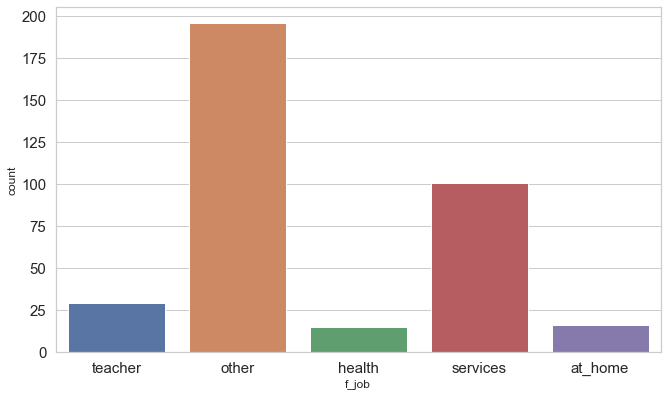

In [48]:
count_plot(data.f_job)

> Similar situation is for fathers but the difference in numbers for each job is significantly higher in comparison to mothers

### Reason for choosing a school

In [50]:
data.reason.unique()

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

In [51]:
data.reason = data.reason.apply(nan_killer)
data.reason.unique()

array(['course', 'other', 'home', 'reputation', None], dtype=object)

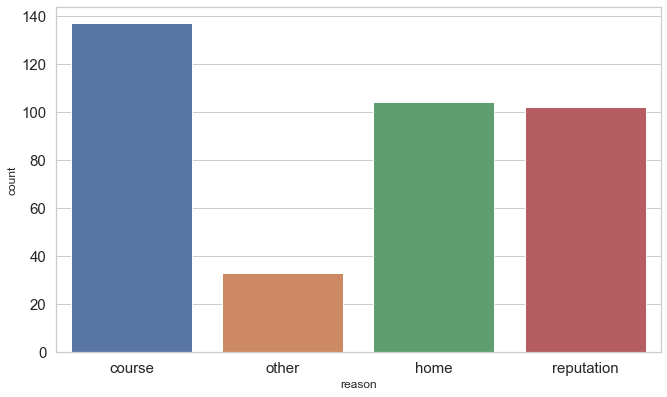

In [52]:
count_plot(data.reason)

> The educational course was the most popular reason for choosing a school

### Guardian (who takes care of a student)

In [53]:
data.guardian.unique()

array(['mother', 'father', 'other', nan], dtype=object)

In [54]:
data.guardian = data.guardian.apply(nan_killer)
data.guardian.unique()

array(['mother', 'father', 'other', None], dtype=object)

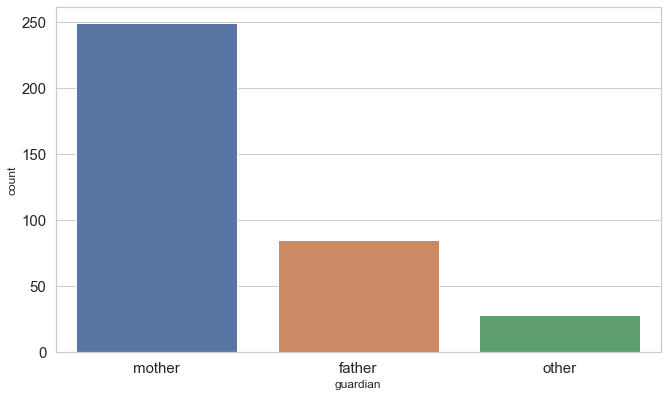

In [55]:
count_plot(data.guardian)

> Usually a mother is who takes care of a student (more than 2 times more frequently than fathers)

### Travel time


In [57]:
data.travel_time.unique()

array([ 2.,  1.,  3., nan,  4.])

In [59]:
data.travel_time = data.travel_time.astype(str).apply(nan_killer)
data.travel_time.unique()

array(['2.0', '1.0', '3.0', None, '4.0'], dtype=object)

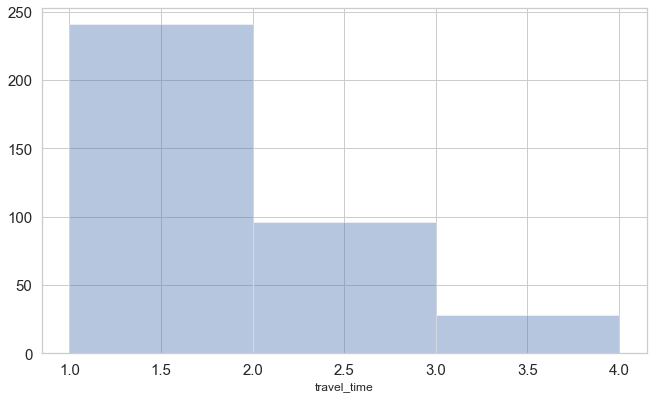

In [65]:
dist_plot(data.travel_time.astype(float), bins=3, kde=False)

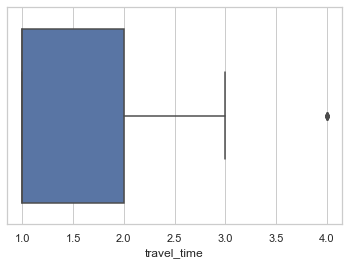

In [64]:
sns.boxplot(data.travel_time.astype(float))

> There is an outlier which spends more than 60 minutes on his/her way to school

In [66]:
data = data.loc[data.travel_time != '4.0']
data

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,study_time,higher,internet,romantic,fam_rel,free_time,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0
